# Step 1 

In [10]:
# Import pandas as pd
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



# Step 2 Data Exploration

In [11]:
#load dataset
df = pd.read_csv('meningitis.csv')
df.head()


,id,gender,gender_male,gender_female,age,child_group,adult_group,meningitis,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Female,0,1,32,0,1,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Male,1,0,32,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Female,0,1,24,0,1,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Female,0,1,63,0,1,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Male,1,0,9,1,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1


In [12]:
#We can use the shape attribute to get the number of rows and columns in the dataset:
df.shape


(284484, 19)

In [13]:
#use the info() method to get more information about the dataset, such as the data types of each column,
#the number of non-null values in each column, and the memory usage of the DataFrame:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              284484 non-null  int64 
 1   gender          284484 non-null  object
 2   gender_male     284484 non-null  int64 
 3   gender_female   284484 non-null  int64 
 4   age             284484 non-null  int64 
 5   child_group     284484 non-null  int64 
 6   adult_group     284484 non-null  int64 
 7   meningitis      284484 non-null  int64 
 8   serotype        284484 non-null  object
 9   NmA             284484 non-null  int64 
 10  NmC             284484 non-null  int64 
 11  NmW             284484 non-null  int64 
 12  health_status   284484 non-null  object
 13  alive           284484 non-null  int64 
 14  dead            284484 non-null  int64 
 15  report_outcome  284484 non-null  object
 16  unconfirmed     284484 non-null  int64 
 17  confirmed       284484 non-nu

In [14]:
#use the describe() method to get some descriptive statistics of the numerical features in the dataset, 
#such as the mean, standard deviation, minimum, maximum, and quartiles:
df.describe()


,id,gender_male,gender_female,age,child_group,adult_group,meningitis,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,144727.037932,0.482319,0.517681,34.732396,0.291707,0.708293,0.099696,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,83406.850454,0.499688,0.499688,22.240912,0.454549,0.454549,0.299595,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72441.750000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,144916.500000,0.000000,1.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,217301.250000,1.000000,1.000000,54.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,288422.000000,1.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#We can also use the value_counts() method to get the frequency of each unique value in a categorical feature column:
df['serotype'].value_counts()


Null                                    256121
Neisseria meningitidis group W (NmW)     14194
Neisseria meningitidis group C (NmC)      7130
Neisseria meningitidis group A (NmA)      7038
null serotype                                1
Name: serotype, dtype: int64

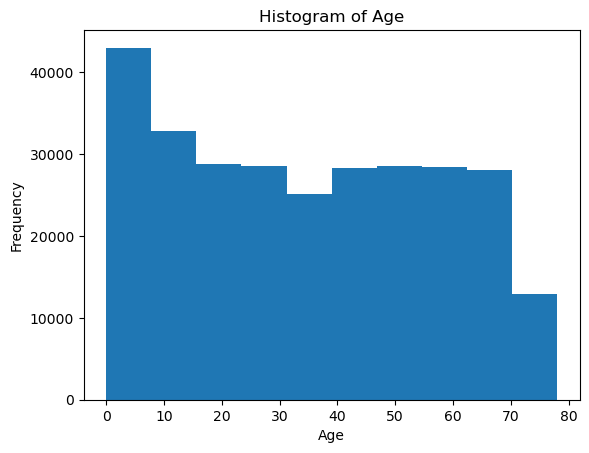

In [16]:
#plot a histogram of the age distribution in the dataset 
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


# Step 3 data Cleaning

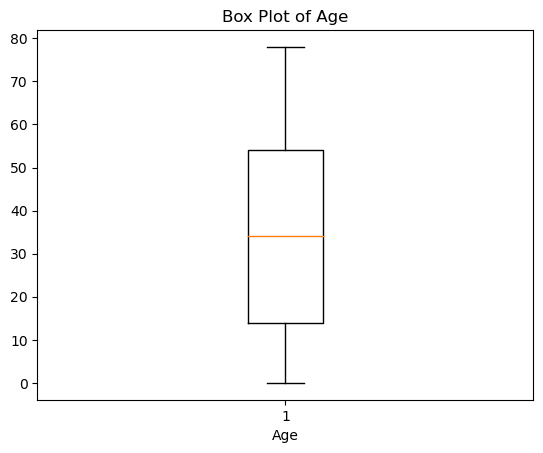

In [17]:
#box plot to see outliers
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()


In [19]:
#delete outliers
Q1 = df['age'].quantile(0.25) # 25% quartile
Q3 = df['age'].quantile(0.75) # 75% quartile
IQR = Q3 - Q1 # interquartile range
lower_bound = Q1 - 1.5 * IQR # lower bound for outliers
upper_bound = Q3 + 1.5 * IQR # upper bound for outliers
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)] # delete outliers


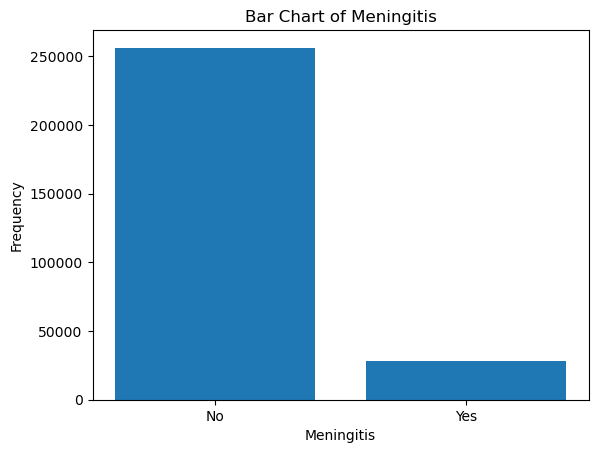

In [21]:
#handle imbalance
plt.bar(['No', 'Yes'], df['meningitis'].value_counts())
plt.xlabel('Meningitis')
plt.ylabel('Frequency')
plt.title('Bar Chart of Meningitis')
plt.show()


# Step 4 Split Dataset